<a href="https://colab.research.google.com/github/jugernaut/TallerMeIA/blob/main/Eval/Ejemplos/SOM_MeIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Clasificador</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
</font>

In [ ]:
# bibliotecas que se van a usar
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from macti.evaluation import *
file_answer = FileAnswer()

path = "./Textos"
# En caso de no existir el directorio de docs
isExist = os.path.exists(path)
if not isExist:

    # Se crea el directorio
    os.makedirs(path)

    # Se descargan los archivos
    for i in range(1,12):
        nombre = 'texto'+str(i)+'.txt'
        url = 'https://raw.githubusercontent.com/jugernaut/Induccion_MeIA/angel/utils/data/textosMike/'+nombre
        response = requests.get(url)
        open(path+'/'+nombre, "wb").write(response.content)

In [ ]:
# EJECUTAR ESTA CELDA SOLO SI EL NOTEBOOK ESTA EN MACTI
#from macti.evaluation import Quizz
#quizz = Quizz('1', 'AnalisisNumerico', 'local')

<div class="alert alert-success">

# Objetivos

El propósito de este ejercicio es que el algoritmo que escribas, sea capaz de leer los documentos de la carpeta *Textos* que se descargan al ejecutar la celda superior, y mediante un *SOM* pueda clasificar cada uno de los documentos de manera automática.

<div class="alert alert-success">
## (3 Puntos) Clase `Documento`

Genera una clase de *python* llamada `Documento` que contenga la información de un documento de texto. Esta clase debe tener los siguientes atributos:

* `ruta`: Ruta del documento a procesar.
* `texto`: Texto del documento, en minúsculas.
* `vector_caracteristico`: Lista de frecuencias de las palabras del documento, de aceurdo con el `diccionario_universal`.

Además, debe tener los siguientes métodos:

* `__init__(self, ruta)`: Constructor de la clase. Recibe como parámetro la ruta del documento a procesar. Debe inicializar los atributos `ruta`, `texto` y `vector_caracteristico`.
* `__str__(self)`: Método que devuelve la ruta del documento y su vector característico.
* `preprocesar(self)`: Método que realiza el preprocesamiento del documento. Debe realizar las siguientes tareas:
    * Leer el archivo de texto.
    * Convertir el texto a minúsculas.
* `data_mining(self)`: Método que debe contar la frecuencia de las palabras del documento, de acuerdo al `diccionario_universal` y almacenar el resultado en el atributo `vector_caracteristico`.

Para que la clase `Documento` sea más "ligera", el `diccionario_universal` se define como una variable de clase. Esto quiere decir que es una variable que se comparte entre todas las instancias de la clase. Para definir una variable de clase, basta con definirla fuera de los métodos de la clase, pero dentro de la clase. Por ejemplo:

```python
class Documento:
    diccionario_universal = ['palabra1', 'palabra2', 'palabra3']
    
    def __init__(self, ruta):
        self.ruta = ruta
```

<div class="alert alert-success">
## Diccionario universal

Este diccionario es un conjunto de palabras que debe ser el resultado de analizar todos los documentos y obtener las palabras que aparecen en todos los documentos. De tal manera que este diccionario sirve para poder generar el vector característico de los documentos a procesar.

Para fines prácticos, vamos a pensar que el diccionario universal contiene las siguientes palabras, en este orden:

```python

diccionario_universal = ['factura', 'testamento', 'demanda', 'contrato']

```

In [ ]:
import re
class Documento(object):

    diccionario_univesal = ['factura', 'testamento', 'demanda', 'contrato']

    ### BEGIN SOLUTION
    def __init__(self, ruta):
        self.ruta = ruta
        self.texto = None
        self.vector_caracteristico = []
        self.preprocesar()
        self.data_mining()

    def __str__(self):
        cadena = 'Ruta: '+self.ruta+'\n'
        cadena += 'Vector caracteristico: '+str(self.vector_caracteristico)
        return cadena

    def preprocesar(self):
        archivo = open(self.ruta, 'r')
        self.texto = archivo.read().lower()
        archivo.close()

    def data_mining(self):
        # generamos una lista con las palabaras utilizando el espacio en blanco
        # como patron delimitador para obtener cada una de las palabras
        lista_palabras = re.split('\s+', self.texto)

        # se crea un diccionario para contar la frecuencia de las palabras
        diccionario = {Documento.diccionario_univesal[0]:0, Documento.diccionario_univesal[1]:0,
                       Documento.diccionario_univesal[2]:0, Documento.diccionario_univesal[3]:0}

        for pal in self.diccionario_univesal:
            # contamos la frecuencia de cada palabra
            for palabra in lista_palabras:
                # cada palabra es agregada al diccionario, si ya se tiene tal llave se suma 1
                # en caso de no existir dicha palabra se devuelve cero. En cualquier caso
                # se suma uno por cada vez que aparezca dicha palabra
                if pal == palabra:
                    diccionario[palabra] = diccionario.get(palabra, 0) + 1

        self.vector_caracteristico = [diccionario[pal] for pal in diccionario]
    ### END SOLUTION

<div class="alert alert-success">
## Probando la clase `Documento`

Una vez que se ha definido la clase `Documento`, se debe probar para verificar que funciona correctamente. Para ello, se debe crear una instancia de la clase `Documento` y llamar a los métodos `preprocesar` y `data_mining`. Por ejemplo:

```python
documento = Documento('./Textos/texto1.txt')
print(documento.vector_caracteristico)
```

Y el resultado debe ser exactamente el siguiente:

```
[4, 0, 0, 0]
```

In [ ]:
documento = Documento('./Textos/texto1.txt')
print(documento.vector_caracteristico)

[4, 0, 0, 0]


In [ ]:
# EJECUTAR ESTA CELDA SOLO SI EL NOTEBOOK ESTA EN MACTI
#quizz.eval_numeric('1', documento.vector_caracteristico)
file_answer.write('1', documento.vector_caracteristico, 'Revisa la definición de la clase Documento')

<div class="alert alert-success">
## (2 Puntos) Clase `Clasificador`

Genera una clase de *python* llamada `Clasificador` que genere una lista de objetos de la clase `Documento`. Esta clase debe tener los siguientes atributos:

* `ruta`: Ruta de la carpeta que contiene los documentos a clasificar.
* `documentos`: Lista de objetos de la clase `Documento`.

Además, debe tener los siguientes métodos:

* `__init__(self, ruta)`: Constructor de la clase. Recibe como parámetro la ruta de la carpeta que contiene los documentos a clasificar. Debe inicializar los atributos `ruta` y `documentos`.
* `__str__(self)`: Método que devuelve la ruta de la carpeta y el número de documento a clasificar.
* `cargar_documentos(self)`: Método que debe leer los documentos de la carpeta que se encuentre en `self.ruta` crear un objeto de tipo `Documento`, por cada documento dentro de la carpeta y almacenarlos en la lista `self.documentos`.


In [ ]:
class Clasificador(object):
    ### BEGIN SOLUTION
    def __init__(self, ruta):
        self.ruta = ruta
        self.documentos = []

    def __str__(self):
        cadena = ''
        for doc in self.documentos:
            cadena += str(doc)+'\n'
        return cadena

    def cargar_documentos(self):
        for archivo in os.listdir(self.ruta):
            rutacompleta = self.ruta+'/'+archivo
            if not os.path.isdir(rutacompleta) and not rutacompleta.startswith('.'):
                self.documentos.append(Documento(rutacompleta))
    ### END SOLUTION

<div class="alert alert-success">
## Probando la clase `Clasificador`

Una vez que se ha definido la clase `Clasificador`, se debe probar para verificar que funciona correctamente. Para ello, se debe crear una instancia de la clase `Clasificador` y llamar al método `cargar_documentos`. Por ejemplo:

```python
clasificador = Clasificador('Textos')
clasificador.cargar_documentos()
print(clasificador)
```

Y el resultado debe ser exactamente el siguiente:

```
Ruta: Textos/texto1.txt
Vector caracteristico: [4, 0, 0, 0]
Ruta: Textos/texto2.txt
Vector caracteristico: [2, 0, 0, 0]
Ruta: Textos/texto3.txt
Vector caracteristico: [10, 0, 0, 0]
Ruta: Textos/texto4.txt
Vector caracteristico: [0, 0, 0, 7]
Ruta: Textos/texto5.txt
Vector caracteristico: [0, 0, 0, 5]
Ruta: Textos/texto6.txt
Vector caracteristico: [0, 0, 0, 4]
Ruta: Textos/texto7.txt
Vector caracteristico: [0, 0, 4, 2]
Ruta: Textos/texto8.txt
Vector caracteristico: [0, 0, 2, 1]
Ruta: Textos/texto9.txt
Vector caracteristico: [0, 7, 0, 0]
Ruta: Textos/texto10.txt
Vector caracteristico: [0, 11, 0, 0]
Ruta: Textos/texto11.txt
Vector caracteristico: [0, 4, 0, 0]
```

Recuerda que la primer entrada de cada vector caracteristico es la frecuencia de la palabra `factura`, la segunda entrada es la frecuencia de la palabra `testamento`, la tercera entrada es la frecuencia de la palabra `demanda` y la cuarta entrada es la frecuencia de la palabra `contrato`.

Asi que ya desde este momento puedes comenzar a pensar que clasificación le corresponde a cada documento. Sin embargo, para poder clasificar los documentos de manera automatica, primero se debe entrenar el SOM.


In [ ]:
clasificador = Clasificador('Textos')
clasificador.cargar_documentos()
print(clasificador)

Ruta: Textos/texto1.txt
Vector caracteristico: [4, 0, 0, 0]
Ruta: Textos/texto2.txt
Vector caracteristico: [2, 0, 0, 0]
Ruta: Textos/texto3.txt
Vector caracteristico: [10, 0, 0, 0]
Ruta: Textos/texto4.txt
Vector caracteristico: [0, 0, 0, 7]
Ruta: Textos/texto5.txt
Vector caracteristico: [0, 0, 0, 5]
Ruta: Textos/texto6.txt
Vector caracteristico: [0, 0, 0, 4]
Ruta: Textos/texto7.txt
Vector caracteristico: [0, 0, 4, 2]
Ruta: Textos/texto8.txt
Vector caracteristico: [0, 0, 2, 1]
Ruta: Textos/texto9.txt
Vector caracteristico: [0, 7, 0, 0]
Ruta: Textos/texto10.txt
Vector caracteristico: [0, 11, 0, 0]
Ruta: Textos/texto11.txt
Vector caracteristico: [0, 4, 0, 0]



In [ ]:
# EJECUTAR ESTA CELDA SOLO SI EL NOTEBOOK ESTA EN MACTI
#quizz.eval_datastruct('2', [str(clasificador)])
file_answer.write('2', [str(clasificador)], 'Revisa la definición de la clase Clasificador')

<div class="alert alert-success">
## (2 Puntos) Documentos a clasificar

Crea una lista de vectores caracteristicos de los documentos que se encuentran en la lista `clasificador.documentos`. Por ejemplo:

```python
vectores_caracteristicos = [???]
```

Esta lista debe verse exactamente como la siguiente:

```
[[4, 0, 0, 0], [2, 0, 0, 0], [10, 0, 0, 0], [0, 0, 0, 7], [0, 0, 0, 5], [0, 0, 0, 4], [0, 0, 4, 2], [0, 0, 2, 1], [0, 7, 0, 0], [0, 11, 0, 0], [0, 4, 0, 0]]

```

In [ ]:
vectores_caracteristicos = []

### BEGIN SOLUTION
vectores_caracteristicos = [documento.vector_caracteristico for documento in clasificador.documentos]
print(vectores_caracteristicos)
### END SOLUTION

[[4, 0, 0, 0], [2, 0, 0, 0], [10, 0, 0, 0], [0, 0, 0, 7], [0, 0, 0, 5], [0, 0, 0, 4], [0, 0, 4, 2], [0, 0, 2, 1], [0, 7, 0, 0], [0, 11, 0, 0], [0, 4, 0, 0]]


In [ ]:
# EJECUTAR ESTA CELDA SOLO SI EL NOTEBOOK ESTA EN MACTI
#quizz.eval_datastruct('3', np.array(vectores_caracteristicos))
file_answer.write('3', np.array(vectores_caracteristicos), 'Alguno de tus vectores es incorrecto')

<div class="alert alert-success">
## (3 Puntos) Entrenando el SOM

Crea una instancia de la clase `SOM` con un mapa de $2\times2$ y con 4 entradas. Para ello, se debe crear una instancia de la clase `SOM`, por ejemplo:

```python
som = SOM(2, 2, 4, 10)

```

Ya con el SOM creado, se debe entrenar con los vectores caracteristicos de los documentos. Para ello, se debe llamar al método `train` del objeto `som`. Por ejemplo:

```python
som.train(vectores_caracteristicos)
```

Y finalmente, podemos ver la lista que nos devuelve el método `map_vects`. Por ejemplo:

```python
print(som.map_vects(vectores_caracteristicos))
```

El resultado der.

```
[array([1, 1]), array([1, 0]), array([1, 0]), array([0, 0]), array([0, 0]), array([1, 1]), array([0, 0]), array([0, 1]), array([0, 1]), array([1, 1]), array([0, 1])]
```

Esta es la clasificación que el SOM le ha dado a cada documento. Por ejemplo, el primer documento se encuentra en la posición `[1, 1]` del mapa, el segundo documento se encuentra en la posición `[1, 0]` del mapa, el tercer documento se encuentra en la posición `[1, 0]` del mapa, etc.

In [ ]:
# EJECUTAR ESTA CELDA
!pip install --user tensorflow

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from matplotlib import pyplot as plt

class SOM(object):
    """
    Clase que representa una red neuronal tipo SOM.
    """

    #Para revisar si la red ya ha sido entrenada
    _trained = False

    def __init__(self, m, n, dim, n_iterations=100, alpha=None, sigma=None):
        """
        Constructor que toma como parametros los valores descritos en el
        algoritmo SOM. Genera un mapa de m renglones por n columnas y se entrenara
        con n_iterations
        """

        #Se inicializan variables que seran usadas a lo largo del coidgo
        self._m = m
        self._n = n
        if alpha is None:
            alpha = 0.3
        else:
            alpha = float(alpha)
        if sigma is None:
            sigma = max(m, n) / 2.0
        else:
            sigma = float(sigma)
        self._n_iterations = abs(int(n_iterations))

        '''SE NECESITA UNA GRAFICA (PLANO), hay una grafica
        por default pero la guardamos en _graph'''
        self._graph = tf.Graph()

        '''SE CREAN LOS ELEMENTOS NECESARIOS EN LA GRAFICA'''
        with self._graph.as_default():
            '''SE CREAN TODAS LAS NEURONAS CON tf.Variable, son m*n
            neuronas con dim pesos, que seran comparados con los pesos
            de la entrada y la que tenga la menor distancia sera la
            neurona ganadora. Antes de iniciar el entrenamiento, hay
            hay que inicializar TODAS las variables'''

            '''Lista de pesos de los vectores de la red neuronal'''
            self._weightage_vects = tf.Variable(tf.random.normal(
                [m*n, dim]))

            '''Lista de 600 entradas, y cada entrada representa una
            coordenada en la cual se encuentra cada neurona'''
            self._location_vects = tf.constant(np.array(
                list(self._neuron_locations(m, n))))

            '''self._vect_input es un placeholder de tamano dim, ya que
            es el objeto que sera alimentado con el vector de entrada y
            a su vez este sera comparado con los pesos de cada neurona.
            Esto es asi por el framework que da tensorflow'''
            self._vect_input = tf.placeholder("float", [dim])

            '''Lo mismo sucede con esta variable, la diferencia es que en
            este punto aun no se sabe cuantas iteraciones (epocas) seran
            necesarias, asi que se deja en cero.'''
            self._iter_input = tf.placeholder("float")

            '''Devuelve el indice con el menor valor, es decir la neurona mas cercana.'''
            bmu_index = tf.argmin(tf.sqrt(tf.reduce_sum(
                tf.pow(tf.subtract(self._weightage_vects, tf.stack(
                    [self._vect_input for i in range(m*n)])), 2), 1)),
                                  0)

            '''Variable que guarda el indice y un espacio para el sus
            coordenada'''
            slice_input = tf.pad(tf.reshape(bmu_index, [1]),
                                 np.array([[0, 1]]))
            bmu_loc = tf.reshape(tf.slice(self._location_vects, slice_input,
                                          tf.constant(np.array([1, 2]))),
                                 [2])

            '''Valores necesario para actualizar los pesos de las neuronas
            de acuerdo a la iteracion (epoca)'''
            learning_rate_op = tf.subtract(1.0, tf.div(self._iter_input,
                                                  self._n_iterations))
            _alpha_op = tf.multiply(alpha, learning_rate_op)
            _sigma_op = tf.multiply(sigma, learning_rate_op)

            '''Calcula las distancias al cuadrado por cada neurona con respecto
            a la neurona GANADORA (BMU). De tal manera que estos valores
            puedan ser empleados para actualizar los pesos de los vecinos'''
            bmu_distance_squares = tf.reduce_sum(tf.pow(tf.subtract(
                self._location_vects, tf.stack(
                    [bmu_loc for i in range(m*n)])), 2), 1)
            neighbourhood_func = tf.exp(tf.negative(tf.div(tf.cast(
                bmu_distance_squares, "float32"), tf.pow(_sigma_op, 2))))
            learning_rate_op = tf.multiply(_alpha_op, neighbourhood_func)

            '''Tasa de aprendizaje para actualizar los pesos de las neuronas'''
            learning_rate_multiplier = tf.stack([tf.tile(tf.slice(
                learning_rate_op, np.array([i]), np.array([1])), [dim])
                                               for i in range(m*n)])
            weightage_delta = tf.multiply(
                learning_rate_multiplier,
                tf.subtract(tf.stack([self._vect_input for i in range(m*n)]),
                       self._weightage_vects))

            '''Actualiza todos los pesos de las neuronas de acuerdo a los
            parametros calculados previamente'''
            new_weightages_op = tf.add(self._weightage_vects,
                                       weightage_delta)

            '''Se guarda la ultima operacion realizada en la SOM, ya que
            esta operacion sera la que se ejecute y a su vez ejecuta todas
            las operaciones previar al llamar a sess.run()'''
            self._training_op = tf.assign(self._weightage_vects,
                                          new_weightages_op)

            '''En tensorflow todo debe ocurrir dentro de una sesion, es por
            este motivo que se guarda la sesion'''
            self._sess = tf.Session()

            '''Forma en la tensorflow inicializa sus variables antes de ser
            utilizadas'''
            init_op = tf.initialize_all_variables()
            self._sess.run(init_op)

            '''centroid_grid es un mapa de bits en el cual se guardan los
            valores de las neuronas. Es de tamano m, por que para cada renglon
            se tienen n neuronas y sus respectivos valores. '''
            centroid_grid = [[] for i in range(self._m)]
            self._weightages = list(self._sess.run(self._weightage_vects))
            self._locations = list(self._sess.run(self._location_vects))

            '''Con este for, se accede a cada neurona por posicion y se guarda
            en centroid_grid sus pesos. El resultado es un mapa de bits que puede
            ser facilmente graficado por matplotlib. Es el mapa incial (SIN ENTRENAR)'''
            for i, loc in enumerate(self._locations):
                centroid_grid[loc[0]].append(self._weightages[i])
            self._mapa_inicial = centroid_grid

    def _neuron_locations(self, m, n):
        '''Yield regresa un generador flojo, y hasta que es necesario
        se evalua. Esto se hace para que no haya informacion no necesaria
        en memoria. En el constructor el resultado de esta funcion se
        mete en una lista para que sea accesible de inmediato'''
        for i in range(m):
            for j in range(n):
                yield np.array([i, j])

    def train(self, input_vects, debbug=False):
        if not debbug:
            #centroid_grid = [[] for i in range(self._m)]
            '''Para cada iteracion (epoca) se realiza el entrenamiento'''
            for iter_no in range(self._n_iterations):
                actual = self._sess.run(tf.norm(self._weightage_vects))
                #Se entrena con cada vector uno por uno
                for input_vect in input_vects:
                    self._sess.run(self._training_op,
                                  feed_dict={self._vect_input: input_vect,
                                              self._iter_input: iter_no})
                siguiente = self._sess.run(tf.norm(self._weightage_vects))
                '''Si la norma del mapa actual no varia mucho con respecto
                al siguiente, se rompe el ciclo de las epocas'''
                if abs(siguiente - actual) <= 0.000001:
                    break
            '''centroid_grid es un mapa de bits en el cual se guardan los
                valores de las neuronas. Es de tamano m, por que para cada renglon
                se tienen n neuronas y sus respectivos valores. '''
            centroid_grid = [[] for i in range(self._m)]
            self._weightages = list(self._sess.run(self._weightage_vects))
            self._locations = list(self._sess.run(self._location_vects))

            '''Con este for, se accede a cada neurona por posicion y se guarda
                en centroid_grid sus pesos. El resultado es un mapa de bits que puede
                ser facilmente graficado por matplotlib. En este punto la red ya esta entrenada.'''
            for i, loc in enumerate(self._locations):
                centroid_grid[loc[0]].append(self._weightages[i])
            self._centroid_grid = centroid_grid

            '''En este punto la red ya esta entrenada.'''
            self._trained = True
            '''Esta seccion muestra como se entrena el SOM y es basicamente el mismo
            codigo de la seccion del if y al final solo se agrega la grafica del mapa.'''
        else:
            centroid_grid = [[] for i in range(self._m)]

            for iter_no in range(self._n_iterations):
                actual = self._sess.run(tf.norm(self._weightage_vects))
                #Se entrena con cada vector uno por uno
                for input_vect in input_vects:
                    self._sess.run(self._training_op,
                                  feed_dict={self._vect_input: input_vect,
                                              self._iter_input: iter_no})
                siguiente = self._sess.run(tf.norm(self._weightage_vects))

                if abs(siguiente - actual) <= 0.000001:
                    break
                if iter_no % 10 == 0:
                    centroid_grid = [[] for i in range(self._m)]
                    self._weightages = list(self._sess.run(self._weightage_vects))
                    self._locations = list(self._sess.run(self._location_vects))

                    for i, loc in enumerate(self._locations):
                        centroid_grid[loc[0]].append(self._weightages[i])
                    self._centroid_grid = centroid_grid

                    red_entrenada = som.get_centroids()
                    # SECCION PARA GRAFICAR
                    bmu = self.map_vect(input_vect)
                    plt.text(bmu[1], bmu[0], "bmu", ha='center', va='center',
                        bbox=dict(facecolor='white', alpha=0.5, lw=0))
                    plt.imshow(red_entrenada)
                    plt.show()
                    input("Continuar?")

            '''En este punto la red ya esta entrenada.'''
            self._trained = True

    def get_centroids(self):
        # Solo devuelve los centroides para que puendan ser graficados
        #if not self._trained:
            #raise ValueError("La red aun no ha sido entrenada")
        return self._centroid_grid

    def map_vects(self, input_vects):
        '''to_return es la lista que contiene las coordenadas (x,y) de la
        neurona que mas se parece a cada una de las entradas de input_vects
        en el mismo orden'''

        if not self._trained:
            raise ValueError("SOM not trained yet")

        to_return = []
        for vect in input_vects:
            min_index = min([i for i in range(len(self._weightages))],
                            key=lambda x: np.linalg.norm(vect-
                                                         self._weightages[x]))
            to_return.append(self._locations[min_index])

        return to_return

    def map_vect(self, vect):
        '''
        Mapea un solo vector y devuelve la clasificacion vista como
        un indice relacionado a la coordenada (x,y) de la neurona
        '''

        min_index = min([i for i in range(len(self._weightages))],
                        key=lambda x: np.linalg.norm(
                            vect - self._weightages[x]))
        pos2D = self._locations[min_index]
        # polinomio de direccionamiento de la neurona
        #return pos2D[0]*self._m + pos2D[1], pos2D
        return (pos2D[1], pos2D[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


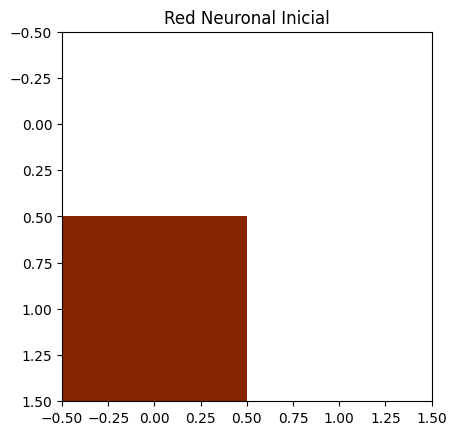

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[array([0, 0]), array([0, 0]), array([0, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 1]), array([1, 1]), array([0, 1]), array([0, 1]), array([0, 1])]


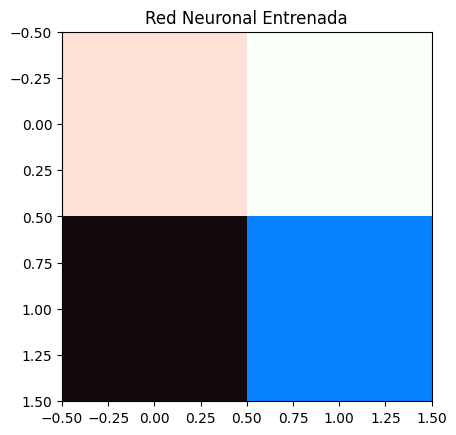

In [ ]:
# Crea un SOM de 2x2 neuronas y con 4 entradas por cada neurona
### BEGIN SOLUTION
som = SOM(2, 2, 4, 10)

# Se muestra el mapa inicial
mapa_inicial = som._mapa_inicial
plt.imshow(mapa_inicial)
plt.title('Red Neuronal Inicial')
plt.show()

# Se entrena la red con un conjunto de colores
som.train(vectores_caracteristicos)

# Obtenemos el SOM ya entrenado
red_entrenada = som.get_centroids()

# Contiene la lista de coordenadas de los correspondientes colores
mapeados = som.map_vects(vectores_caracteristicos)

print(mapeados)

# Grafica
plt.imshow(red_entrenada)
plt.title('Red Neuronal Entrenada')
plt.show()
### END SOLUTION

Dada la naturaleza aleatoria inicial del mapa, es posible que tu clasificación sea diferente a la que se muestra arriba. Sin embargo, si se ha hecho todo correctamente, la clasificación debe ser muy similar a la que se muestra arriba.

Finalmente mediante el polinomio de direccionamiento, se puede "aplanar" el mapa y obtener una lista de clasificaciones. Por ejemplo:

```python
clasificaciones = [0,0,0,0]
for clas in mapeados:
    # polinomio de direccionamiento para aplanar el mapa
    clasificaciones[clas[0]*som._m + clas[1]] += 1
print(clasificaciones)
```

Si ordenas la lista de clasificaciones de mayor a menor y todo funciona de manera correcta el resultado que verás será el siguiente:

```python
[3, 3, 3, 2]    
```

Lo que significa que tenemos 3 documentos clasificados como `contrato`, 3 documentos clasificados como `factura`, 3 documentos clasificados como `testamento` y 2 documentos clasificados como `demanda`. Si no me crees, puedes revisar manualmente cada documento y verificar que la clasificación es correcta.


In [ ]:
clasificaciones = [0,0,0,0]
### BEGIN SOLUTION
for clas in mapeados:
    clasificaciones[clas[0]*som._m + clas[1]] += 1

clasificaciones.sort(key=lambda x: x, reverse=True)
print(clasificaciones)
### END SOLUTION

[3, 3, 3, 2]


In [ ]:
# EJECUTAR ESTA CELDA SOLO SI EL NOTEBOOK ESTA EN MACTI
#quizz.eval_numeric('4', clasificaciones)
file_answer.write('4', clasificaciones, 'Alguna de tus clasificaciones es incorrecta')

In [ ]:
file_answer.to_file('1')

El directorio :/home/jovyan/AnalisisNumerico/.ans/SOM/ ya existe
Respuestas y retroalimentación almacenadas.


## Observaciones

Para facilitar el desarrollo de este ejercicio se proporcionan elementos que deberían obtenerse de los datos a procesar, como por ejemplo el diccionario de palabras, la lista de documentos, etc. Sin embargo, si se desea, este ejercicio se puede usar como base para un proyecto más ambicioso, en el que se procesen documentos reales.

Finalmente el polinomio de direccionamiento es una manera de "aplanar" el mapa y obtener una lista de clasificaciones.

Se deja como ejercicio para el lector, incrementar la dificultad de este ejercicio, procesando más documentos o usando tamaños de mapa más grandes para obtener mejores resultados, además de diccionarios más grandes para obtener clasificaciones más precisas.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/AlgoritmosBusqueda/traemethanos.gif?raw=1" width="600">   
</center>

"¡Traiganme a Thanos!"
-Thor, infinity war.